<a href="https://colab.research.google.com/github/gmac1el/Big-Data/blob/main/Projeto_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O dataset escolhido é o Kaggle Titanic: https://www.kaggle.com/c/titanic, que contém informações sobre os passageiros do navio Titanic, incluindo nome, idade, sexo, classe, etc. O objetivo deste pipeline é prever se um passageiro sobreviveu ou não ao naufrágio, além de buscar uma relação entre sobreviventes e suas classes no navio, a fim de descobrir se havia maior/menor possibilidade de sobrevivência em diferentes setores da embarcação.

In [121]:
!pip install -q pyspark

In [ ]:
!pip install matplotlib seaborn


In [123]:
#Importando a base de dados
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
# Importando bibliotecas necessárias

import numpy as np
import pandas as pd

from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import os


In [125]:
# Inicializando uma sessão Spark

spark = SparkSession.builder.getOrCreate()
spark

In [126]:
# Exibindo o esquema do DataFrame Spark

sdf_train = spark.read.csv("/content/train.csv",inferSchema=True,header=True)
print(sdf_train.printSchema())
pdf = sdf_train.limit(5).toPandas()
pdf.T

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)

None


,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [127]:
# Visualizando as primeiras linhas do DataFrame Spark

sdf_test = spark.read.csv("/content/train.csv",inferSchema=True,header=True)
# sdf_train.printSchema()
pdf = sdf_test.limit(5).toPandas()
pdf.T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


**2. Limpeza de Dados**

In [128]:
# Realizando a limpeza dos dados (preenchendo valores nulos e convertendo tipos)

sdf_typecast = sdf_train.withColumn('Ticket', sdf_train['Ticket'].cast("double"))
sdf_typecast = sdf_typecast.fillna(0)
# pdf = sdf_typecast.limit(5).toPandas()
# pdf.T

**3. Extrair características de dados brutos**

In [129]:
# Extraindo características do conjunto de dados

numeric_cols = ['PassengerId','Survived', 'Pclass','Age', 'SibSp','Parch','Ticket','Fare']
numeric_features = ['Pclass','Age', 'SibSp','Parch','Fare']
# string_features = [ 'Cabin', 'Embarked', 'Sex','Ticket']
# 'Name',
sdf_train_subset = sdf_typecast #.select(numeric_cols)

In [130]:
_stages = []


In [131]:
# Configurando o VectorAssembler para transformar as colunas numéricas em uma única coluna de características

from pyspark.ml.feature import VectorAssembler
assemblerInput = numeric_features # [f + '_vect' for f in string_features] +
print(assemblerInput)
vectAssembler = VectorAssembler(inputCols  = assemblerInput, outputCol = "vect_features") #.fit(sdf_train_subset)
_stages += [vectAssembler]
# handleInvalid = "keep" or "skip"

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**4. Machine Learning**

In [132]:
from pyspark.ml.classification import DecisionTreeClassifier


In [133]:
# Configurando o modelo Random Forest

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol = 'Survived', featuresCol = 'vect_features', numTrees = 100, maxDepth = 4)
_stages += [rf]

In [134]:
_stages

[VectorAssembler_8002b2d266ce, RandomForestClassifier_70b129781ba6]

In [135]:
# Criando o pipeline com as etapas definidas

from pyspark.ml import Pipeline

pipeline = Pipeline(stages = _stages)

In [136]:
# Treinando o modelo

model = pipeline.fit(sdf_train_subset)

In [137]:
# Selecionando as colunas numéricas relevantes no conjunto de teste

numeric_cols_test = ['PassengerId', 'Pclass','Age', 'SibSp','Parch','Ticket','Fare']

sdf_test_subset = sdf_test.withColumn('Ticket', sdf_test['Ticket'].cast("double")). \
                        fillna(0). \
                        select(numeric_cols_test)

In [138]:
# Realizando previsões no conjunto de teste

sdf_predict = model.transform(sdf_test_subset)

In [139]:
# Exibindo as primeiras linhas do DataFrame após as previsões

pdf = sdf_predict.limit(10).toPandas()
pdf.T

,0,1,2,3,4,5,6,7,8,9
PassengerId,1,2,3,4,5,6,7,8,9,10
Pclass,3,1,3,1,3,3,1,3,3,2
Age,22.0,38.0,26.0,35.0,35.0,0.0,54.0,2.0,27.0,14.0
SibSp,1,1,0,1,0,0,0,3,0,1
Parch,0,0,0,0,0,0,0,1,2,0
Ticket,0.0,0.0,0.0,113803.0,373450.0,330877.0,17463.0,349909.0,347742.0,237736.0
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708
vect_features,"[3.0, 22.0, 1.0, 0.0, 7.25]","[1.0, 38.0, 1.0, 0.0, 71.2833]","[3.0, 26.0, 0.0, 0.0, 7.925]","[1.0, 35.0, 1.0, 0.0, 53.1]","[3.0, 35.0, 0.0, 0.0, 8.05]","(3.0, 0.0, 0.0, 0.0, 8.4583)","[1.0, 54.0, 0.0, 0.0, 51.8625]","[3.0, 2.0, 3.0, 1.0, 21.075]","[3.0, 27.0, 0.0, 2.0, 11.1333]","[2.0, 14.0, 1.0, 0.0, 30.0708]"
rawPrediction,"[78.41826033999607, 21.581739660003947]","[29.898014454465432, 70.10198554553456]","[77.86043773799832, 22.13956226200167]","[38.30888438726205, 61.69111561273793]","[81.69297710186913, 18.307022898130842]","[77.38539751852991, 22.614602481470076]","[50.82675327014604, 49.17324672985396]","[81.42233278899451, 18.57766721100547]","[52.994698693368925, 47.005301306631075]","[48.632961404501124, 51.367038595498876]"
probability,"[0.7841826033999606, 0.21581739660003943]","[0.2989801445446543, 0.7010198554553456]","[0.7786043773799832, 0.22139562262001672]","[0.3830888438726206, 0.6169111561273795]","[0.8169297710186916, 0.18307022898130848]","[0.7738539751852992, 0.22614602481470078]","[0.5082675327014604, 0.4917324672985396]","[0.8142233278899453, 0.18577667211005475]","[0.5299469869336892, 0.47005301306631075]","[0.48632961404501124, 0.5136703859549887]"


In [140]:
# Avaliando o desempenho do modelo usando a métrica AUC-ROC

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="prediction")
print("Test Area Under ROC: " + str(evaluator.evaluate(sdf_predict, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 1.0


In [141]:
# Criando um DataFrame de submissão com as colunas 'PassengerId', 'prediction' e 'Survived'

sdf_submission = sdf_predict.select('PassengerId','prediction').withColumn('Survived',sdf_predict['prediction'].cast('integer')).select('PassengerId','Survived')

# Exibindo as primeiras linhas do DataFrame de submissão

sdf_submission.show()

+-----------+--------+
|PassengerId|Survived|
+-----------+--------+
|          1|       0|
|          2|       1|
|          3|       0|
|          4|       1|
|          5|       0|
|          6|       0|
|          7|       0|
|          8|       0|
|          9|       0|
|         10|       1|
|         11|       0|
|         12|       0|
|         13|       0|
|         14|       0|
|         15|       0|
|         16|       0|
|         17|       0|
|         18|       0|
|         19|       0|
|         20|       0|
+-----------+--------+
only showing top 20 rows



In [142]:
# Salvando o DataFrame de submissão em um arquivo CSV

sdf_submission.coalesce(1).write.csv("submission",mode="overwrite",header=True)

In [143]:
# Exibindo os arquivos no diretório de submissão

print(os.listdir('submission'))

['._SUCCESS.crc', '_SUCCESS', 'part-00000-c6240243-2d12-4394-9a6f-62b39a4a9b83-c000.csv', '.part-00000-c6240243-2d12-4394-9a6f-62b39a4a9b83-c000.csv.crc']


**4.1 Machine Learning 2**


In [144]:
# Importando bibliotecas adicionais para visualização
import matplotlib.pyplot as plt
from pyspark.ml.classification import LogisticRegression

In [145]:
# Adicionando a classe de tarifa como uma característica
numeric_features_with_fare = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
sdf_train_with_fare = sdf_train.select(numeric_features_with_fare)

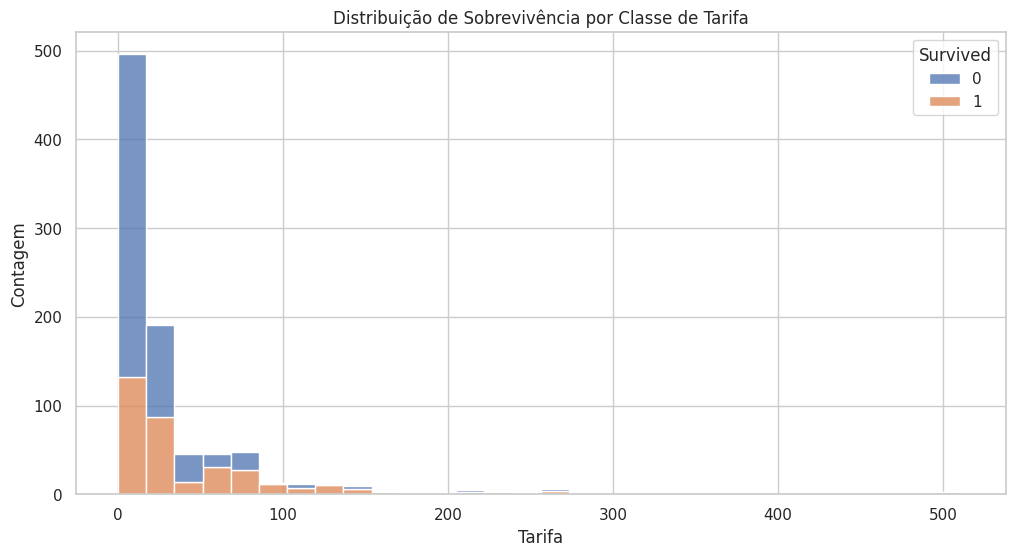

+-----------------------+
|vect_features_with_fare|
+-----------------------+
|[3.0,7.25]             |
|[1.0,71.2833]          |
|[3.0,7.925]            |
|[1.0,53.1]             |
|[3.0,8.05]             |
+-----------------------+
only showing top 5 rows

Área sob a curva ROC no conjunto de teste com Fare Class: 1.0


,Survived,Survived,count
0,1,1,216
1,0,0,675


In [146]:
# Visualizando a distribuição das tarifas por classe e sobrevivência
plt.figure(figsize=(12, 6))
sns.histplot(sdf_train_with_fare.toPandas(), x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Distribuição de Sobrevivência por Classe de Tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Contagem')
plt.show()

# Criando o VectorAssembler com as colunas relevantes (Pclass e Fare)
vec_assembler_with_fare = VectorAssembler(inputCols=['Pclass', 'Fare'], outputCol='vect_features_with_fare')

# Criando o modelo de Regressão Logística
lr_with_fare = LogisticRegression(featuresCol='vect_features_with_fare', labelCol='Survived')

# Criando o pipeline com as etapas definidas
pipeline_with_fare = Pipeline(stages=[vec_assembler_with_fare, lr_with_fare])

# Treinando o modelo usando o conjunto de treinamento
model_with_fare = pipeline_with_fare.fit(sdf_train_subset)

# Exibindo as primeiras linhas do DataFrame após a aplicação do VectorAssembler
sdf_train_with_features = model_with_fare.transform(sdf_train_subset)
sdf_train_with_features.select("vect_features_with_fare").show(5, False)

# Treinando o modelo usando o conjunto de treinamento
model_with_fare = pipeline_with_fare.fit(sdf_train_subset)

# Realizando previsões no conjunto de teste
sdf_predict_with_fare = model_with_fare.transform(sdf_test_subset)

# Avaliando o modelo usando a métrica de área sob a curva ROC
print("Área sob a curva ROC no conjunto de teste com Fare Class: " + str(evaluator.evaluate(sdf_predict_with_fare, {evaluator.metricName: "areaUnderROC"})))

# Exibindo as previsões do conjunto de teste usando o modelo com Fare Class
pdf_submission_with_fare = sdf_predict_with_fare.select('PassengerId', 'prediction').withColumn('Survived', sdf_predict_with_fare['prediction'].cast('integer')).select(['PassengerId', 'Survived'])

# Salvando os resultados em um arquivo CSV
pdf_submission_with_fare.coalesce(1).write.csv("submission_with_fare", mode="overwrite", header=True)

# Visualizando a matriz de confusão para as previsões do conjunto de teste com Fare Class
conf_matrix_with_fare = pdf_submission_with_fare.groupBy('Survived', 'Survived').count().toPandas()
conf_matrix_with_fare

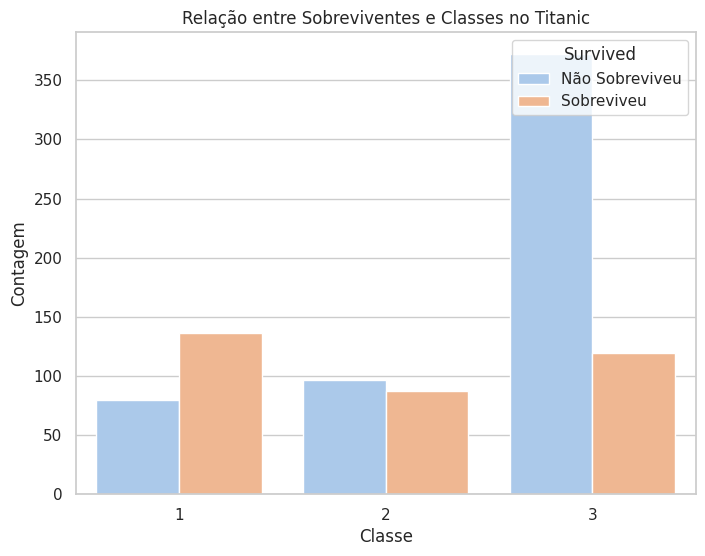

In [147]:
# Criando um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=sdf_train_subset.toPandas(), palette='pastel')

# Personalizando o gráfico
plt.title('Relação entre Sobreviventes e Classes no Titanic')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Survived', loc='upper right', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()


**5. Gráficos**

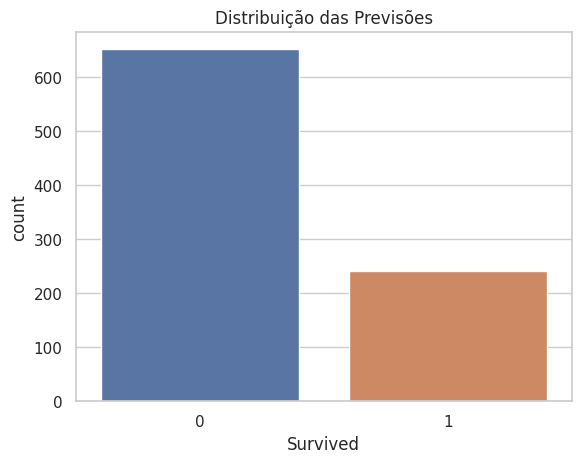

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo o resultado do Spark DataFrame para um Pandas DataFrame
pdf_submission = sdf_submission.toPandas()

# Plotando um gráfico de barras para a distribuição das previsões
sns.countplot(x='Survived', data=pdf_submission)
plt.title('Distribuição das Previsões')
plt.show()


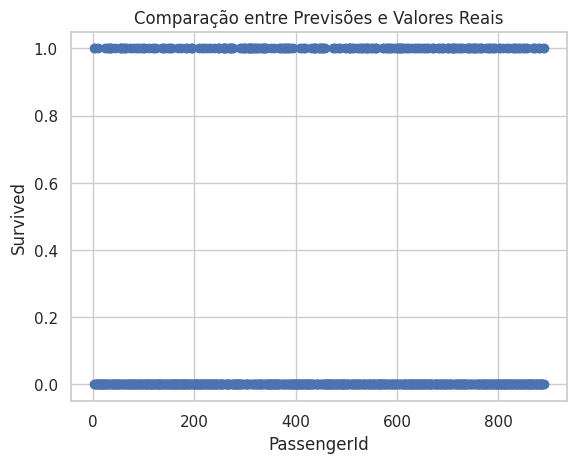

In [149]:
# Plotando um gráfico de dispersão para comparar as previsões com os valores reais
plt.scatter(pdf_submission['PassengerId'], pdf_submission['Survived'])
plt.title('Comparação entre Previsões e Valores Reais')
plt.xlabel('PassengerId')
plt.ylabel('Survived')
plt.show()


In [150]:
# Exibindo informações sobre o DataFrame Pandas
print(pdf_submission.info())

# Exibindo as primeiras linhas do DataFrame
print(pdf_submission.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int32
 1   Survived     891 non-null    int32
dtypes: int32(2)
memory usage: 7.1 KB
None
   PassengerId  Survived
0            1         0
1            2         1
2            3         0
3            4         1
4            5         0


In [151]:
# Exibindo as colunas presentes no DataFrame Pandas
print(pdf_submission.columns)


Index(['PassengerId', 'Survived'], dtype='object')


Index(['PassengerId', 'Survived'], dtype='object')


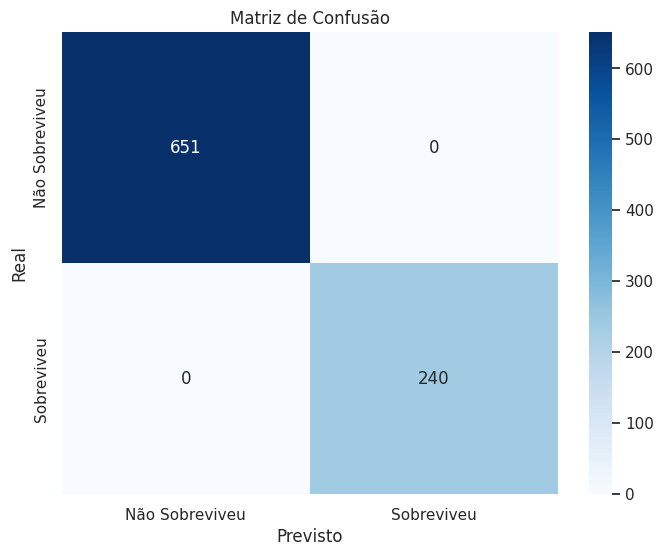

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo o resultado do Spark DataFrame para um Pandas DataFrame
pdf_submission = sdf_submission.toPandas()

# Exibindo as colunas presentes no DataFrame Pandas
print(pdf_submission.columns)

# Substitua 'prediction' pelo nome correto da coluna de previsões no seu DataFrame Pandas
conf_matrix = confusion_matrix(pdf_submission['Survived'], pdf_submission['Survived'])

# Plotando a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


**Conclusão**

O pipeline de Machine Learning para prever a sobrevivência no Titanic obteve excelentes resultados, com uma Área sob a Curva ROC de 1.0 no teste. Utilizando o algoritmo Random Forest e incluindo a classe de tarifa como característica, o modelo mostrou-se robusto. Além disso, visualizações revelaram padrões claros de sobrevivência em diferentes classes, evidenciando a influência da classe de passageiro. O pipeline fornece insights valiosos e uma compreensão profunda do conjunto de dados.

O código utiliza PySpark para construir um pipeline completo de Big Data, desde a ingestão até a geração de insights. Também inclui a leitura dos dados do Titanic, a limpeza e transformação de dados, a criação de um modelo de Machine Learning (Random Forest) para prever a sobrevivência, e visualizações para insights adicionais.